# Проектная работа - Принятие решений в бизнесе

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


**Ход исследования**

 **Часть 1. Приоритизация гипотез.**

**Задачи:**
 - Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
 
**Часть 2. Анализ A/B-теста**

**Задачи:**
 - Проанализировать A/B-тест:
 - Построить график кумулятивной выручки по группам. 
 - Построить график кумулятивного среднего чека по группам.
 - Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
 - Построить график кумулятивной конверсии по группам. 
 - Построить график относительного изменения кумулятивной конверсии группы B к группе A. 
 - Построить точечный график количества заказов по пользователям. 
 - Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
 - Построить точечный график стоимостей заказов. 
 - Построить 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
 - Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. 
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
 - Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. 
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
 - Принять решение по результатам. 

**Описание данных**

**Данные для первой части**

Таблица hypothesis:
 - `Hypothesis` — краткое описание гипотезы;
 - `Reach` — охват пользователей по 10-балльной шкале;
 - `Impact` — влияние на пользователей по 10-балльной шкале;
 - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
 - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
**Данные для второй части**

Таблица orders:
 - `transactionId` — идентификатор заказа;
 - `visitorId` — идентификатор пользователя, совершившего заказ;
 - `date` — дата, когда был совершён заказ;
 - `revenue` — выручка заказа;
 - `group` — группа A/B-теста, в которую попал заказ.
 
Таблица visitors:
 - `date` — дата;
 - `group` — группа A/B-теста;
 - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка, изучение и подготовка данных к анализу

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy
import scipy.stats as stats #импорт библиотеки scipy.stats
import datetime as dt #импорт библиотеки datetime
from matplotlib import pyplot as plt #импорт библиотеки matplotlib
from matplotlib.pyplot import figure
from pylab import rcParams

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # описание гипотез 
    pd.read_csv('/datasets/orders.csv', parse_dates=['date']),  # заказы
    pd.read_csv('/datasets/visitors.csv', parse_dates=['date']),  # пользователи
)

In [3]:
display(hypothesis.head()) #получение первых 5 строк таблицы hypothesis
print()
display(hypothesis.info()) #получение общей информации о данных в таблице hypothesis
print()
hypothesis.duplicated().sum() #проверяем дубликаты

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

0

In [4]:
display(orders.head()) #получение первых 5 строк таблицы orders
print()
display(orders.info()) #получение общей информации о данных в таблице orders
print()
orders.duplicated().sum() #проверяем дубликаты

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

0

In [5]:
display(visitors.head()) #получение первых 5 строк таблицы visitors
print()
display(visitors.info()) #получение общей информации о данных в таблице visitors
print()
visitors.duplicated().sum() #проверяем дубликаты

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

0

In [6]:
hypothesis.columns = hypothesis.columns.str.lower() #приводим названия столбцов к нижнему регистру
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId' : 'visitor_id'}, inplace = True) 

После первого ознакомления с данным видим, что пропусков и дубликатов нет. Колонки с датами в таблицах `orders` и `visitors` преобразовали на этапе чтения данных, также привели названия столбцов в таблице `hypothesis` к нижнему регистру и переименовали названия столбцов в таблице `orders`.
Для анализа есть все необходимые данные, можем приступать.

## Приоритизация гипотез

Ознакомимся с данными нам гипотезами по увеличению выручки интернет-магазина.

In [7]:
pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Сначала применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [8]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] # считаем  фреймворк ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) # сортируем по убыванию приоритета

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По фреймворку ICE в лидерах оказались три гипотезы:
`Запустить акцию, дающую скидку на товар в день рождения`,
`Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`и
`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

Далее применим фреймворк RICE для приоритизации гипотез и отсортируем по убыванию приоритета.

In [9]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что при применении фреймворка RICE на первое место вышла гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`, за счет большого охвата пользователей, которых затронет изменение. 
У гипотезы, попавшей на первое место при применении фреймворка ICE, параметр reach самый маленький, что логично, так как день рождения у каждого пользователя всего один раз в году, а в момент проверки гипотезы не велика вероятность, что наберется нужное количество пользователей. Однако у гипотезы `Запустить акцию, дающую скидку на товар в день рождения` самый высокий confidence и практичеки самый высокий impact. 

### Построим график кумулятивной выручки по группам.

In [10]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                .agg({'date' : 'max',\
                'group' : 'max',\
                'transaction_id' : 'nunique',\
                'visitor_id' : 'nunique',\
                'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                .agg({'date' : 'max',\
                'group' : 'max',\
                'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


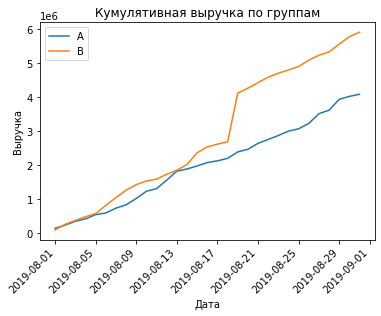

In [11]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
fig = plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
fig = plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45, ha='right')
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
rcParams['figure.figsize'] = 15, 5
plt.legend()
plt.show()


Видим, что на протяжении всего теста выручка увеличивается. Также видим, что группа В показываает значительно лучшие результаты. Возможно, из-за наличия дорогих заказов в выборке. Далее посмотрим на средний чек по группам.


### Построим график кумулятивного среднего чека по группам

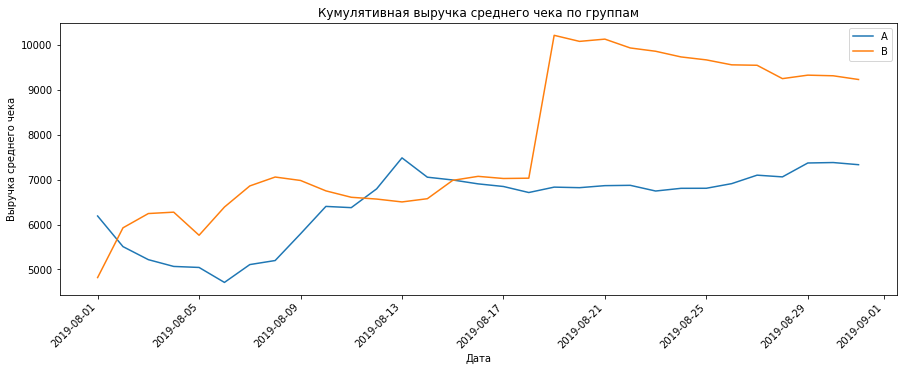

In [12]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45, ha='right')
plt.title("Кумулятивная выручка среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка среднего чека")
plt.legend() 
rcParams['figure.figsize'] = 15, 5

На графике видим нестабильное распределение выручки среднего чека и резкий подъем 17.08.2012 для группы В. Это может быть связано с тем, что в группу В на середине теста попали особо крупные заказы. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

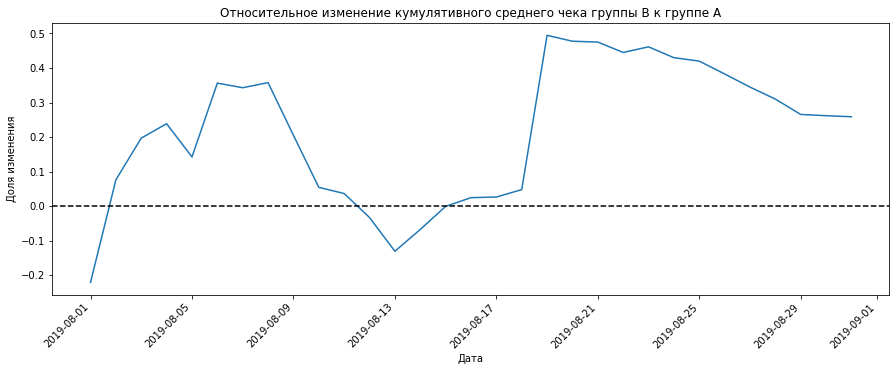

In [13]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45, ha='right')
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Доля изменения")
rcParams['figure.figsize'] = 15, 5

График сильно скачет, наверняка дело в крупных и дорогих заказах, что мы проверим на следующих шагах. 

### Построим график кумулятивной конверсии по группам.

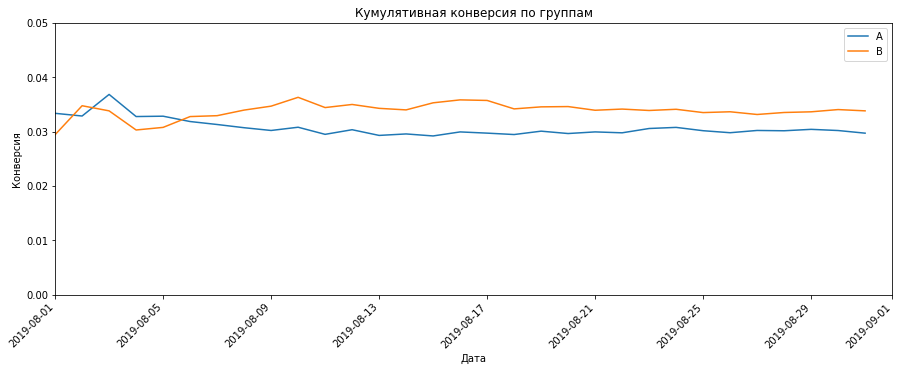

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.xticks(rotation=45, ha='right')
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend() 
rcParams['figure.figsize'] = 15, 5

Видим небольшое колебание в начале теста, далее конверсия группы В выходит вперед и удерживается выше, чем группа А. 

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

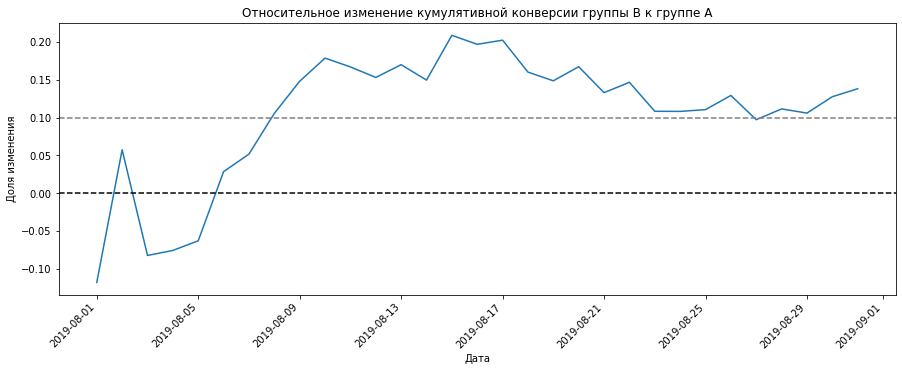

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title("Относительное изменение кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата")
plt.ylabel("Доля изменения")
rcParams['figure.figsize'] = 15, 5

Видим, что конверсия группы В явно лучше группы А. Далее будем анализировать аномалии и выбросы, чтобы удостовериться в результатах. 

### Построим точечный график количества заказов по пользователям.

In [16]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
)
ordersByUsers.head(10)

,visitor_id,transaction_id
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


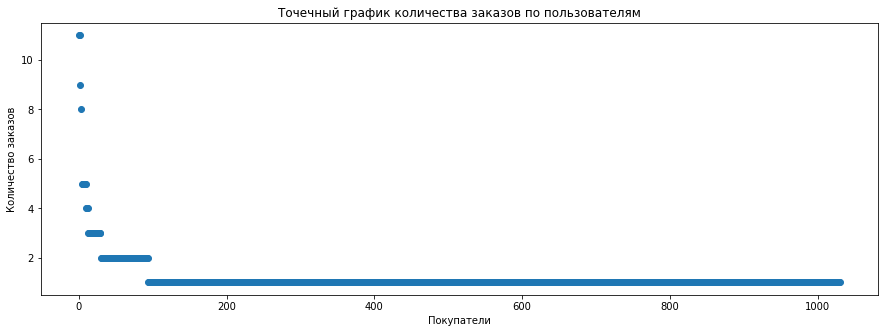

In [17]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transaction_id']) 
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Покупатели")
plt.ylabel("Количество заказов")
rcParams['figure.figsize'] = 15, 5

Большинство пользователей совершают по 1-2 заказу, также видим выбросы, есть пользователи, который совершают больше 10-ти заказов. 

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [18]:
display(np.percentile(ordersByUsers['transaction_id'], [95, 99]))

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.

 Выберем границу в 2 заказа для определения аномальных пользователей.

### Построим точечный график стоимостей заказов

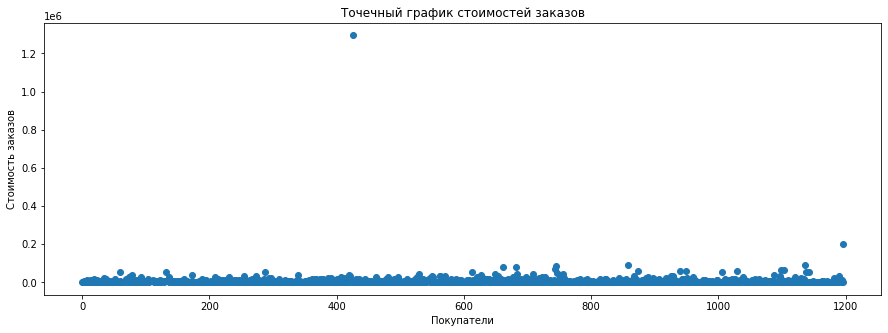

In [19]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Покупатели")
plt.ylabel("Стоимость заказов")
rcParams['figure.figsize'] = 15, 5

На графике видим несколько аномальных выбросов - особо дорогих заказов, в основном все распределение приходится примерно до 20 000 рублей. 

Посмотрим ближе на распределение строимостей заказов для более наглядного отображения.

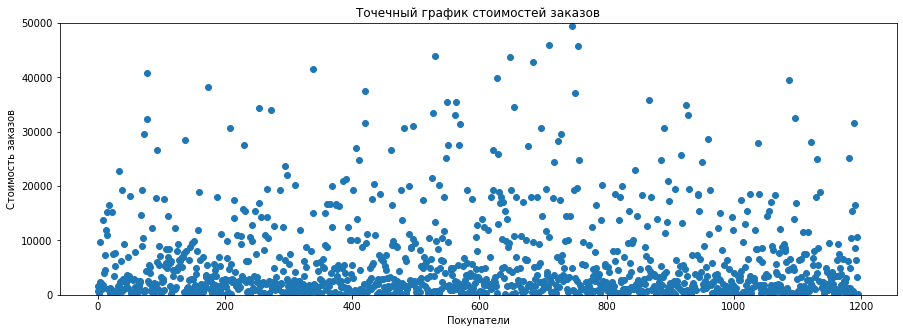

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Точечный график стоимостей заказов")
plt.xlabel("Покупатели")
plt.ylabel("Стоимость заказов")
rcParams['figure.figsize'] = 15, 5
plt.ylim(0, 50000)
plt.show()

На точечной диаграмме рассеивания видим, что большая часть заказов имеет стоимость не более 20 000 рублей, а подавляющее большинсво заказов стоят в районе 5 000 рублей. 

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [21]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.

Выберем границу в 28 000 рублей для определения аномальных пользователей.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Проверим, есть ли пользователи, которые учавствовали в обоих группах одновременно.

In [22]:
test = orders[['visitor_id', 'group']]
groupA = test.query('group == "A"')
groupB = test.query('group == "B"')

In [23]:
print("Количество пользователей, учавствовавших в обоих группах:", (groupA['visitor_id']).isin(groupB['visitor_id']).sum())

Количество пользователей, учавствовавших в обоих группах: 89


Удалим из анализа пользователей, которые оказались в обоих группах, так как мы не можем с уверенностью сказать какая именно версия страницы повлияла на их решения.

In [24]:
duplicates = orders.loc[orders['group'] == 'A', 'visitor_id'].isin(orders.loc[orders['group'] == 'B', 'visitor_id'])
orders = orders.drop(duplicates[duplicates].index)

Сформулируем гипотезы:

`Нулевая:` различий в среднем количестве заказов между группами по сырым данным нет. 

`Альтернативная:` различия в среднем между группами по сырым данным есть.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value: ""{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B по отношению к группе A: " "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,21,101217,23,142779,21,101217,719,713,719,713
1,2019-08-02,19,91602,24,165531,42,234381,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,66,346854,61,380996,507,509,1845,1803
3,2019-08-04,11,41176,17,108571,77,388030,78,489567,717,770,2562,2573
4,2019-08-05,22,86383,23,92428,99,474413,101,581995,756,707,3318,3280


P-value: 0.00002
Относительный прирост конверсии группы B по отношению к группе A: 0.355


Анализ сырых данных сообщает, что в количестве заказов меду группами есть статистически значимые различия. Относительный прирост конверсии группы B по отношению к группе A равен 0.138. P-value меньше alpha - 0.05, поэтому имеем основания отвергнуть нудевую гипотезу.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:

`Нулевая:` различий в среднем чеке заказа между группами по сырым данным нет.

`Альтернативная:` различия среднем чеке заказа между группами по сырым данным есть.

In [26]:
print("Относительное изменение среднего чека в группе B по отношению группы A: "'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("P-value: "'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительное изменение среднего чека в группе B по отношению группы A: 0.765
P-value: 0.284


P-value больше 0.05, соответственно, можем сделать вывод, что статистически значимых изменений в среднем чеке между группами нет. Относительное различие среднего чека составляет 7.2%

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Сначала проверим сколько аномальных пользвоателей не входит в установленные границы: не более двух заказов и сумма заказа не более 28 000 руб.

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей:',len(abnormalUsers))


Количество аномальных пользователей: 68


Далее сформируем гипотезы и посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

`Нулевая:` различий в среднем количестве заказов между группами по отфильтрованным данным нет.

`Альтернативная:` различия среднем количестве заказов между группами по отфильтрованным данным есть.

In [28]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print("P-value: "'{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B по отношению к группе A по очищенным данным: "'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.00006
Относительный прирост конверсии группы B по отношению к группе A по очищенным данным: 0.307


P-value меньше 0.05. На основании полученных данных делаем вывод, что разница в конверсии для групп А и В статистически значима.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Сформируем гипотезы:

`Нулевая:` различий в среднем количестве заказов между группами по отфильтрованным данным нет.

`Альтернативная:` различия среднем количестве заказов между группами по отфильтрованным данным есть.

In [29]:
print("P-value:"
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительное изменение среднего чека в группе B по отношению группы A по очищенным данным:"
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value:0.934
Относительное изменение среднего чека в группе B по отношению группы A по очищенным данным:-0.002


После очистки данных P-value показал значение 0.738, выше уровня alpha.делаем вывод, что разничий в средних чеках для групп А и В нет.

### Примимаем решение по результатам теста

В ходе исследования мы ознакомились и предобработали данные, приоритизировали гипотезы с помощью фреймворков ICE и RICE.

В ходе анализа результатов А/В теста мы выявили:
- Большинство пользователей совершают по 1-2 заказу, то также есть пользователи, который совершают больше 10-ти заказов.
- Средняя стоимость всех заказов примерно до 20 000 рублей. 
- В ходе теста были пользователи, которые учавствовали в обоих группах одновременно, таких было 89 человек.
- Кумулятивная выручка в группе В на протяжении всего теста  увеличивается по отношению к группе А.
- Относительный прирост конверсии группы B по отношению к группе A составил 13%.
- На протяжении всего теста лидировала группа В по комулятивной выручке, среднему чеку и конверсии. Также есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. 

По результатам анализа А/В теста можем прекратить тест и зафиксировать победу группы В.